title: AirBNB Dataset Linear Regression  
author: Ondra Hruby  
date: 19/10/2023

I chose the AirBNB dataset because it is easy to use for the predictive analysis for this assignment and it is interesting look deep inside this field.  
The dataset was downloaded from https://www.kaggle.com/datasets/konradb/inside-airbnb-netherlands. The dataset used is the listings.csv dataset from Amsterdam, North Holland, The Netherlands, updated on 12th December 2020.  
I wrote the code in Python because I like and prefer to work in this language over R and whenI asked Ms. Holz, she confirmed that I can write the code in Python.

# 1. IMPORT DATASET AND TIDY DATA


### Import the "listings" dataset into "airbnbs" and create a subset shortairbnbs containing less variables that makes it easier to perform a data analysis on the dataset and have a better overview on the data important for the data analysis.

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [430]:
conda install nbconvert

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [431]:
conda install pyppeteer

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - pyppeteer

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


Import the AirBNB dataset and print the first five rows of the dataset

In [370]:
airbnbs = pd.read_csv("~/Documents/Fontys/dasc12/listings.csv")
airbnbs.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,20201212211823,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,20201212211823,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.68


Make smaller dataset easier to perform data analysis

In [371]:
airbnbsvars = ["id", "name", "host_id", "neighbourhood_cleansed", "latitude", 
                "longitude", "property_type", "room_type", "accommodates", "price", "bedrooms", 
                "beds", "bathrooms", "amenities","number_of_reviews", "first_review", "last_review", 
                "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness" , 
                "review_scores_checkin", "review_scores_communication", "review_scores_location"]

shortairbnbs = airbnbs[airbnbsvars]
shortairbnbs.head()


,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,...,amenities,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,$59.00,...,"[""Lock on bedroom door"", ""Carbon monoxide alar...",278,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0
1,20168,Studio with private bathroom in the centre 1,59484,Centrum-Oost,52.36509,4.89354,Private room in townhouse,Private room,2,$236.00,...,"[""Wifi"", ""Hot water"", ""Hangers"", ""Host greets ...",339,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Centrum-West,52.37297,4.88339,Entire apartment,Entire home/apt,3,$125.00,...,"[""Microwave"", ""Refrigerator"", ""Dishes and silv...",5,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,$135.00,...,"[""Carbon monoxide alarm"", ""Private living room...",219,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0
4,28871,Comfortable double room,124245,Centrum-Oost,52.36610,4.88953,Private room in apartment,Private room,2,$75.00,...,"[""Wifi"", ""Hot water"", ""Private entrance"", ""Han...",336,2010-08-22,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0


Check the column types to see if all types are suitable for the data analysis

In [372]:
shortairbnbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18522 entries, 0 to 18521
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18522 non-null  int64  
 1   name                         18489 non-null  object 
 2   host_id                      18522 non-null  int64  
 3   neighbourhood_cleansed       18522 non-null  object 
 4   latitude                     18522 non-null  float64
 5   longitude                    18522 non-null  float64
 6   property_type                18522 non-null  object 
 7   room_type                    18522 non-null  object 
 8   accommodates                 18522 non-null  int64  
 9   price                        18522 non-null  object 
 10  bedrooms                     17508 non-null  float64
 11  beds                         18415 non-null  float64
 12  bathrooms                    0 non-null      float64
 13  amenities       

Convert the "price" column to strings, remove commas, and then convert to float so that it is suitable for plot use

In [373]:
shortairbnbs["price"] = shortairbnbs["price"].astype(str).str.replace(',', '').str[1:].astype(float)
shortairbnbs.head()

/var/folders/n0/t16244hs7cs_6x3cvcpgz3h40000gn/T/ipykernel_90293/413500029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortairbnbs["price"] = shortairbnbs["price"].astype(str).str.replace(',', '').str[1:].astype(float)


,id,name,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,...,amenities,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,59.0,...,"[""Lock on bedroom door"", ""Carbon monoxide alar...",278,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0
1,20168,Studio with private bathroom in the centre 1,59484,Centrum-Oost,52.36509,4.89354,Private room in townhouse,Private room,2,236.0,...,"[""Wifi"", ""Hot water"", ""Hangers"", ""Host greets ...",339,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Centrum-West,52.37297,4.88339,Entire apartment,Entire home/apt,3,125.0,...,"[""Microwave"", ""Refrigerator"", ""Dishes and silv...",5,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,135.0,...,"[""Carbon monoxide alarm"", ""Private living room...",219,2012-01-09,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0
4,28871,Comfortable double room,124245,Centrum-Oost,52.36610,4.88953,Private room in apartment,Private room,2,75.0,...,"[""Wifi"", ""Hot water"", ""Private entrance"", ""Han...",336,2010-08-22,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0


Print the column names from shortairbnbs

In [374]:
shortairbnbs.columns

Index(['id', 'name', 'host_id', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'price',
       'bedrooms', 'beds', 'bathrooms', 'amenities', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location'],
      dtype='object')

Change column names for shortairbnbs to make it easier for the analysis

In [375]:
shortairbnbs = shortairbnbs.rename(columns={
    "neighbourhood_cleansed": "neighbourhood", 
    "review_scores_accuracy": "review_accuracy", 
    "review_scores_cleanliness": "review_cleanliness", 
    "review_scores_rating": "review_rating", 
    "review_scores_checkin": "review_checkin", 
    "review_scores_communication": "review_communication", 
    "review_scores_location": "review_location"})
shortairbnbs.columns

Index(['id', 'name', 'host_id', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'price', 'bedrooms',
       'beds', 'bathrooms', 'amenities', 'number_of_reviews', 'first_review',
       'last_review', 'review_rating', 'review_accuracy', 'review_cleanliness',
       'review_checkin', 'review_communication', 'review_location'],
      dtype='object')

In [376]:
# Show 0 value percentage of each variable
shortairbnbs.eq(0).mean() * 100

# Numbers of NA values in each variable
shortairbnbs.isna().sum()

# Percentage of NA value in each variable
shortairbnbs.isna().mean() * 100

id                        0.000000
name                      0.178167
host_id                   0.000000
neighbourhood             0.000000
latitude                  0.000000
longitude                 0.000000
property_type             0.000000
room_type                 0.000000
accommodates              0.000000
price                     0.000000
bedrooms                  5.474571
beds                      0.577691
bathrooms               100.000000
amenities                 0.000000
number_of_reviews         0.000000
first_review             12.822589
last_review              12.822589
review_rating            14.145341
review_accuracy          14.199331
review_cleanliness       14.199331
review_checkin           14.242522
review_communication     14.204730
review_location          14.231724
dtype: float64


# 2. VISUALIZE THE DATASET


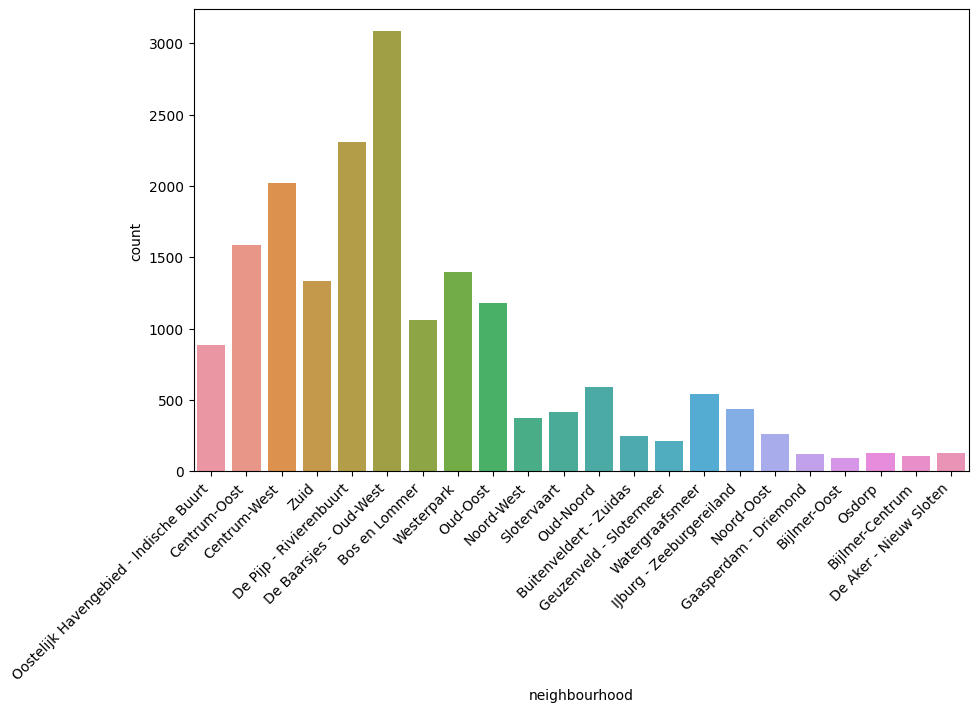

'Show a histogram of how the airbnbs are spread across the different neighbourhoods of Amsterdam'

In [378]:
plt.figure(figsize=(10, 6))
sns.countplot(data=shortairbnbs, x="neighbourhood")
plt.xticks(rotation=45, ha="right")
plt.show()
"""Show a histogram of how the airbnbs are spread across the different neighbourhoods of Amsterdam"""

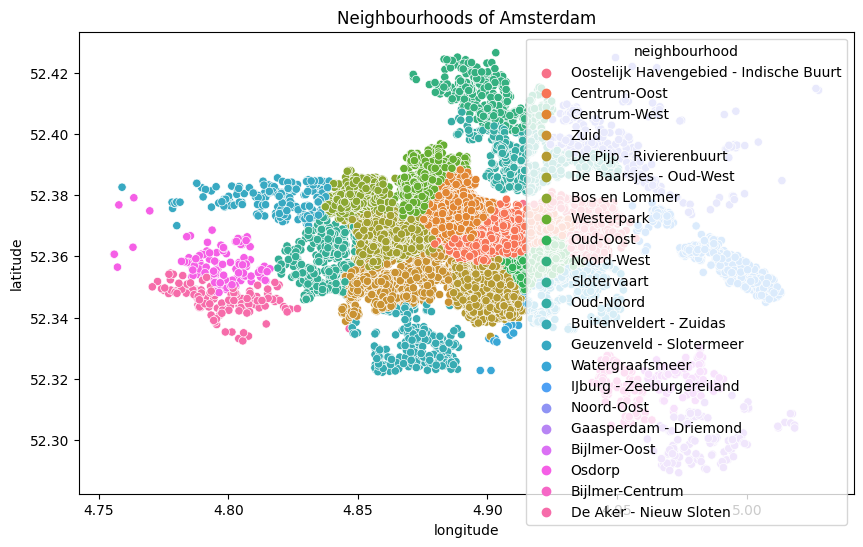

'Show the locations of the individual airbnbs in Amsterdam'

In [379]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shortairbnbs, x="longitude", y="latitude", hue="neighbourhood")
plt.title("Neighbourhoods of Amsterdam")
plt.show()
"""Show the locations of the individual airbnbs in Amsterdam"""

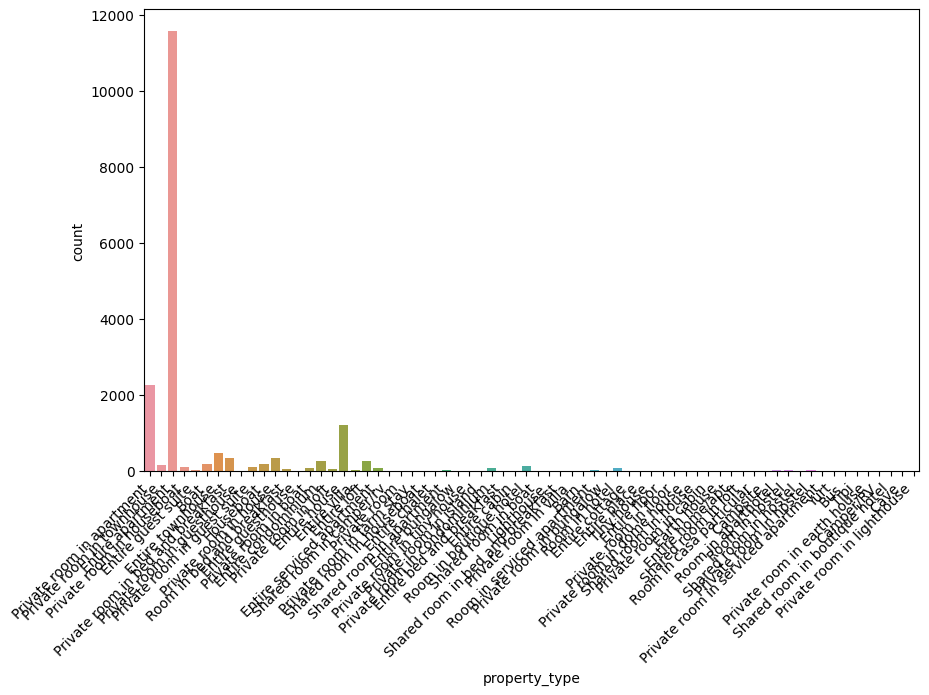

'Show how many airbnbs of each room_type and each property_type there are in Amsterdam'

In [380]:
plt.figure(figsize=(10, 6))
sns.countplot(data=shortairbnbs, x="property_type")
plt.xticks(rotation=45, ha="right")
plt.show()
"""Show how many airbnbs of each room_type and each property_type there are in Amsterdam"""

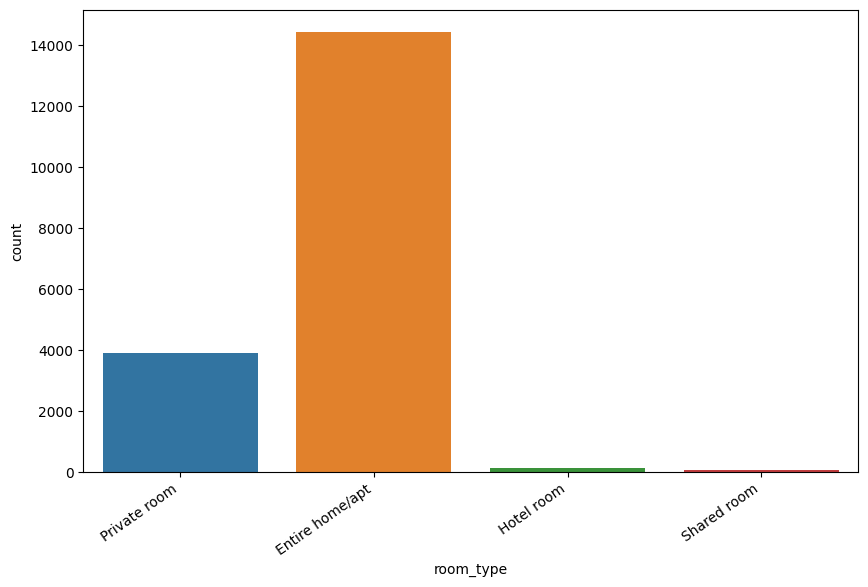

In [382]:
plt.figure(figsize=(10, 6))
sns.countplot(data=shortairbnbs, x="room_type")
plt.xticks(rotation=35, ha="right")
plt.show()

From these two graphs can be seen that only property types and room types that have reasonable value are private rooms and entire home/apt.  
Therefore a new subsets for entire home/apt and private room has been created

In [383]:
airbnbs_private_room = shortairbnbs[shortairbnbs["room_type"] == "Private room"]
airbnbs_entire_home = shortairbnbs[shortairbnbs["room_type"] == "Entire home/apt"]
airbnbs_private_room.head()
airbnbs_entire_home.head()

,id,name,host_id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,price,...,amenities,number_of_reviews,first_review,last_review,review_rating,review_accuracy,review_cleanliness,review_checkin,review_communication,review_location
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Centrum-West,52.37297,4.88339,Entire apartment,Entire home/apt,3,125.0,...,"[""Microwave"", ""Refrigerator"", ""Dishes and silv...",5,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0
6,31080,2-story apartment + rooftop terrace,133488,Zuid,52.35132,4.84838,Entire apartment,Entire home/apt,4,219.0,...,"[""Microwave"", ""Carbon monoxide alarm"", ""Refrig...",32,2011-08-06,2017-10-16,95.0,9.0,10.0,10.0,10.0,9.0
7,41125,Amsterdam Center Entire Apartment,178515,Centrum-West,52.37891,4.88321,Entire apartment,Entire home/apt,3,160.0,...,"[""Microwave"", ""Refrigerator"", ""Dishes and silv...",89,2010-11-25,2020-02-10,96.0,10.0,10.0,10.0,10.0,10.0
8,43109,Oasis in the middle of Amsterdam,188098,Centrum-West,52.37537,4.88932,Entire apartment,Entire home/apt,4,211.0,...,"[""Wifi"", ""Carbon monoxide alarm"", ""Fire exting...",60,2019-10-23,2020-03-07,98.0,10.0,7.0,9.0,10.0,10.0
9,43980,View into park / museum district (long/short s...,65041,Zuid,52.35746,4.86124,Entire apartment,Entire home/apt,2,67.0,...,"[""Beach essentials"", ""First aid kit"", ""Refrige...",61,2010-11-01,2018-02-18,80.0,8.0,7.0,9.0,9.0,9.0


Show 0 value percentage of each variable in airbnbs_private_room

In [384]:
airbnbs_private_room.eq(0).mean() * 100

id                       0.000000
name                     0.000000
host_id                  0.000000
neighbourhood            0.000000
latitude                 0.000000
longitude                0.000000
property_type            0.000000
room_type                0.000000
accommodates             0.000000
price                    0.000000
bedrooms                 0.000000
beds                     3.747433
bathrooms                0.000000
amenities                0.000000
number_of_reviews       15.169405
first_review             0.000000
last_review              0.000000
review_rating            0.000000
review_accuracy          0.000000
review_cleanliness       0.000000
review_checkin           0.000000
review_communication     0.000000
review_location          0.000000
dtype: float64

Show 0 value percentage of each variable in airbnbs_entire_home

In [385]:
""""""
airbnbs_entire_home.eq(0).mean() * 100

id                       0.000000
name                     0.000000
host_id                  0.000000
neighbourhood            0.000000
latitude                 0.000000
longitude                0.000000
property_type            0.000000
room_type                0.000000
accommodates             0.000000
price                    0.000000
bedrooms                 0.000000
beds                     1.669785
bathrooms                0.000000
amenities                0.000000
number_of_reviews       12.104206
first_review             0.000000
last_review              0.000000
review_rating            0.000000
review_accuracy          0.000000
review_cleanliness       0.000000
review_checkin           0.000000
review_communication     0.000000
review_location          0.000000
dtype: float64

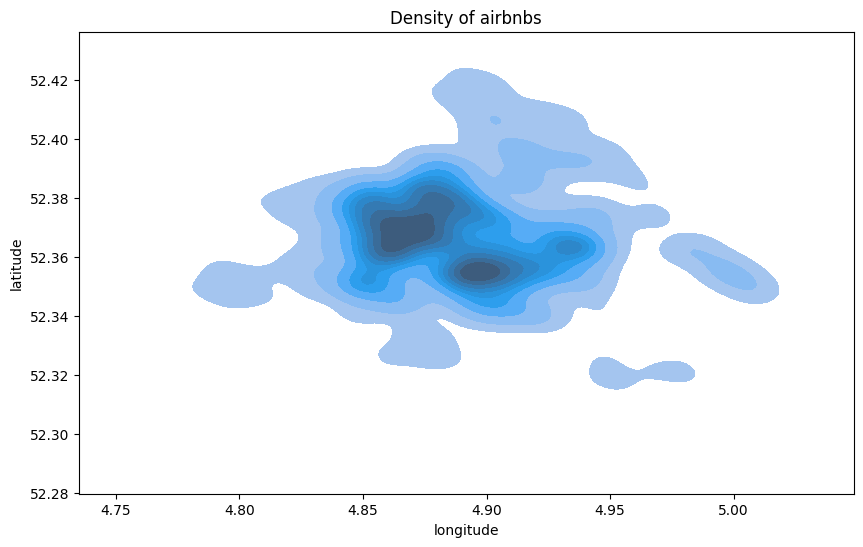

'Show the location of the individual airbnbs and how they are spread across Amsterdam'

In [387]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=shortairbnbs, x="longitude", y="latitude", fill=True)
plt.title("Density of airbnbs")
plt.show()
"""Show the location of the individual airbnbs and how they are spread across Amsterdam"""

This graph shows that the most AirBNBs are in the center and less outside the center

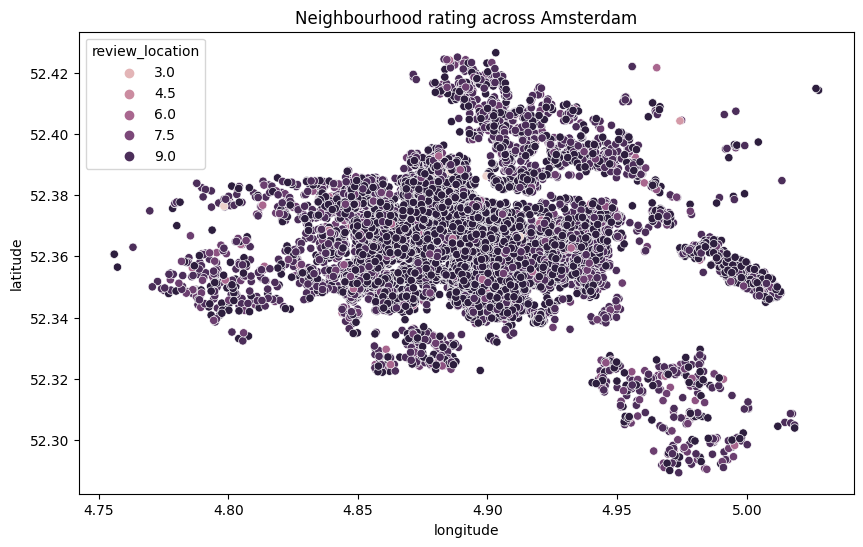

'Show how the individual airbnbs are rated according to their location'

In [388]:
# Drop rows with missing values in 'review_location' column
shortairbnbs = shortairbnbs.dropna(subset=['review_location'])

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shortairbnbs, x="longitude", y="latitude", hue="review_location")
plt.title("Neighbourhood rating across Amsterdam")
plt.show()
"""Show how the individual airbnbs are rated according to their location"""

Create a new table that includes the mean location rating for every neighbourhood, 
how the mean rating in each location varies in neighbourhoods of Amsterdam


In [389]:
neighbourhood_rating_summary = shortairbnbs.groupby("neighbourhood").agg(mean_rating=("review_location", "mean"), n=("neighbourhood", "count")).reset_index()
newtable_rating = pd.merge(shortairbnbs, neighbourhood_rating_summary, on="neighbourhood")
newtable_rating.head()

,id,name,host_id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,price,...,first_review,last_review,review_rating,review_accuracy,review_cleanliness,review_checkin,review_communication,review_location,mean_rating,n
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,59.0,...,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,9.323492,779
1,52490,Amsterdam Aqua,185836,Oostelijk Havengebied - Indische Buurt,52.37005,4.93869,Private room in apartment,Private room,2,75.0,...,2010-11-03,2020-01-01,92.0,10.0,10.0,10.0,10.0,9.0,9.323492,779
2,141708,light modern & cosy apartment,689016,Oostelijk Havengebied - Indische Buurt,52.36674,4.93748,Entire apartment,Entire home/apt,3,145.0,...,2011-06-28,2020-01-02,95.0,9.0,10.0,10.0,10.0,9.0,9.323492,779
3,250751,Modern studio near central AMS,1314658,Oostelijk Havengebied - Indische Buurt,52.36610,4.93299,Entire apartment,Entire home/apt,2,79.0,...,2014-09-25,2020-03-11,92.0,10.0,10.0,9.0,10.0,9.0,9.323492,779
4,415619,Sunny Amsterdam East Harbor View,1336633,Oostelijk Havengebied - Indische Buurt,52.36958,4.93516,Entire apartment,Entire home/apt,3,145.0,...,2012-05-21,2020-09-13,98.0,10.0,10.0,10.0,10.0,10.0,9.323492,779


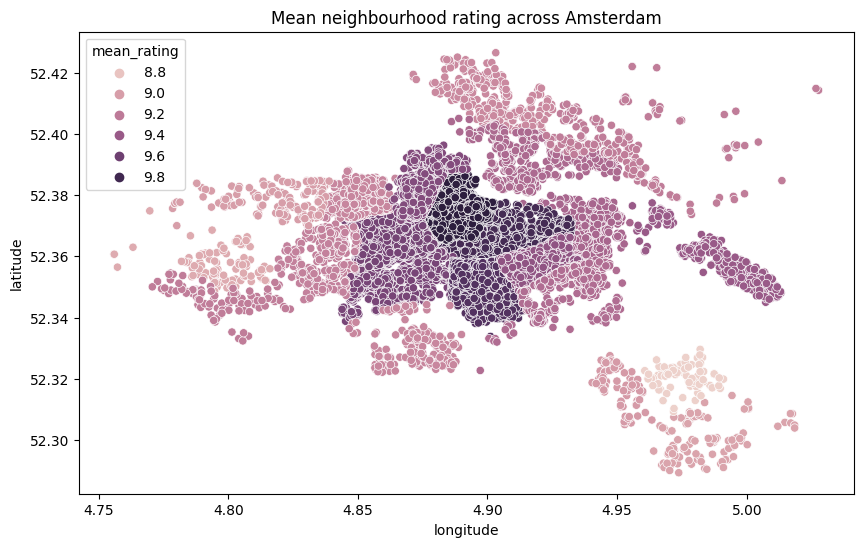

'Show the mean location rating of neighbourhoods in Amsterdam'

In [390]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=newtable_rating, x="longitude", y="latitude", hue="mean_rating")
plt.title("Mean neighbourhood rating across Amsterdam")
plt.show()
"""Show the mean location rating of neighbourhoods in Amsterdam"""

Shows that the highest ratings are mnostly around the center

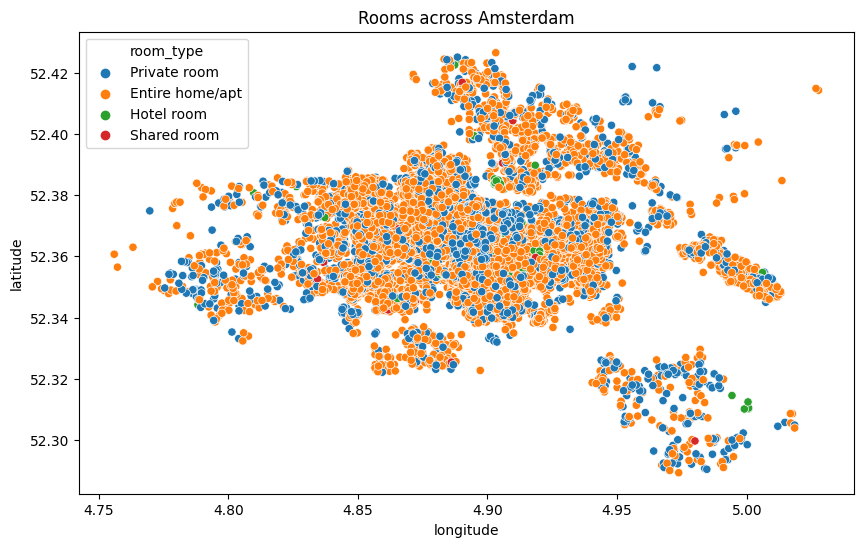

'Show the distribution of room types across Amsterdam'

In [391]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shortairbnbs, x="longitude", y="latitude", hue="room_type")
plt.title("Rooms across Amsterdam")
plt.show()
"""Show the distribution of room types across Amsterdam"""

Shows that rooms are evenly distributed over the city

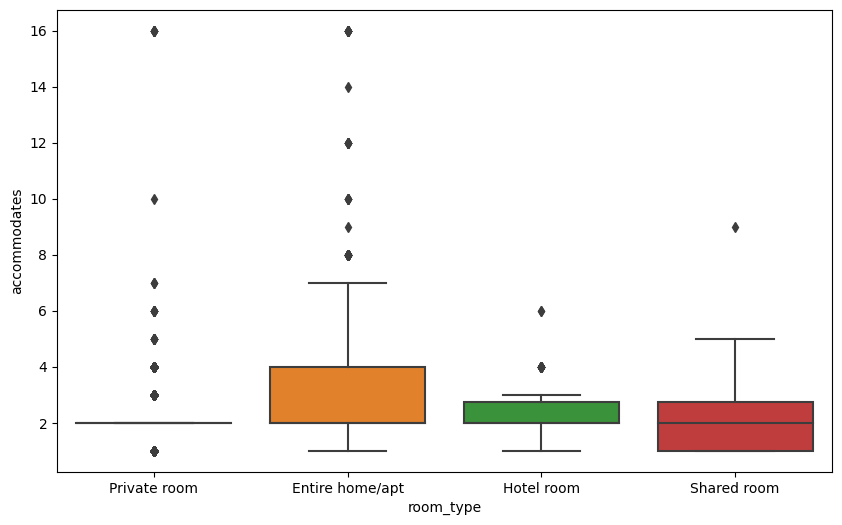

'Create boxplots for how many people an airbnb can accommodate'

In [392]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=shortairbnbs, x="room_type", y="accommodates")
plt.show()
"""Create boxplots for how many people an airbnb can accommodate"""

Graph shows that Private rooms by far mostly accomodate 2 people, 
Entire home/apt 2 - 4 people,   
Hotel rooms 2 -3 people, and   
Shared rooms 1 - 3 people  

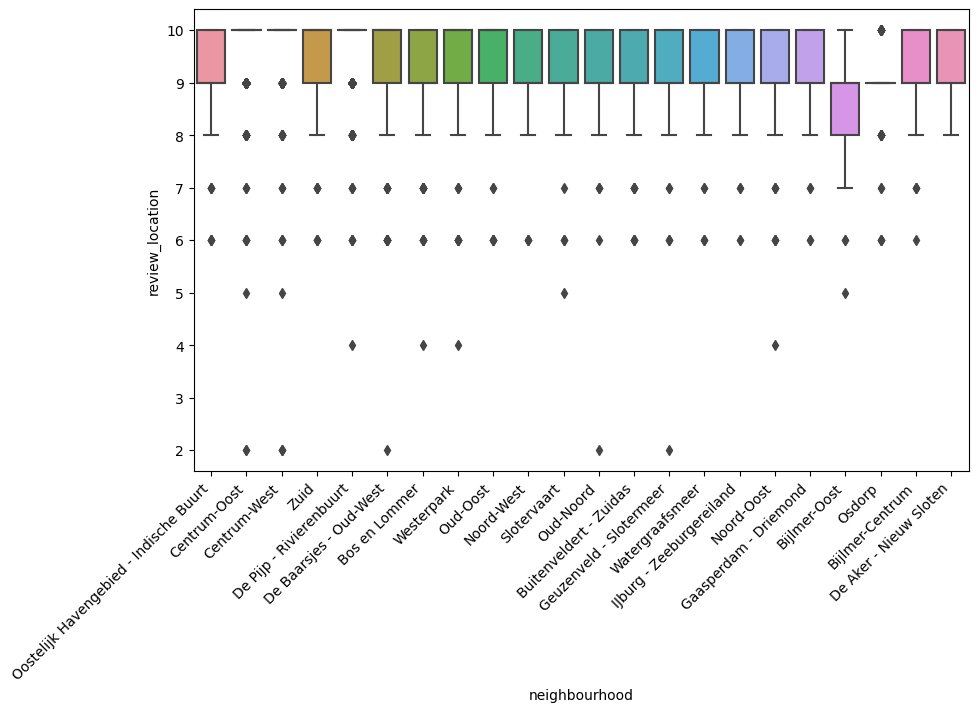

'Show how review_location is related to neighbourhood'

In [393]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=shortairbnbs, x="neighbourhood", y="review_location")
plt.xticks(rotation=45, ha="right")
plt.show()
"""Show how review_location is related to neighbourhood"""

This graph shows that most of the neighbourhoods are rated between mainly 9 and 10, exceptions being Osdorp, 
rated mainly 9, and Bijmer-Oost, rated mainly between 8 and 9.  
And Centrum-Oost, Centrum-West and De Pijp -  Rivierenbuurt are rated mainly at the higehst rate of 10.

### Show how does the price correlate with other variables (room_type, accommodates, neighbourhood, bed, bedrooms)
1. Show how price correlates with room_type

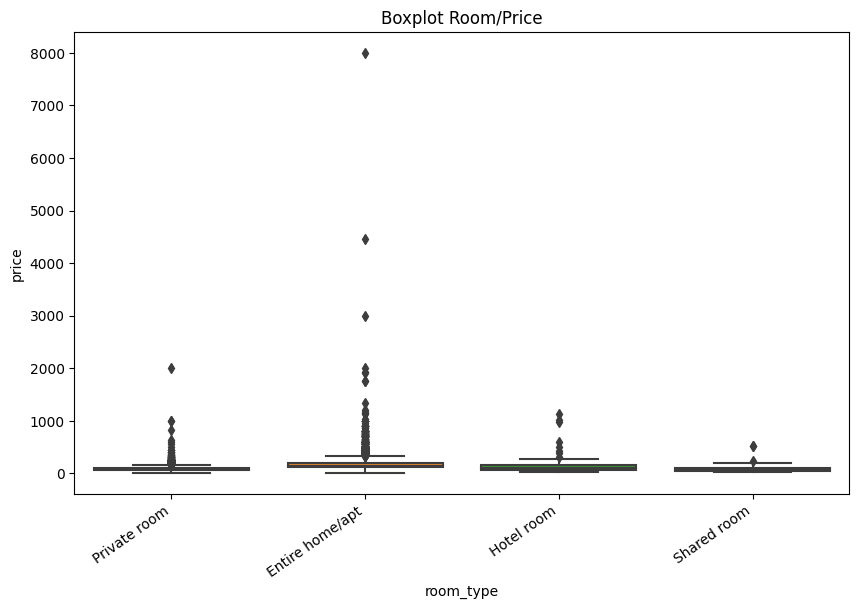

In [394]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=shortairbnbs, x="room_type", y="price")
plt.xticks(rotation=35, ha="right")
plt.title("Boxplot Room/Price")
plt.show()

The boxplot graph shows that the prices differ in every room type but the smallest prices are for shared room, 
followed by a hotel room.

2. Show how price correlates with the maximum number of people the airbnb accommodates

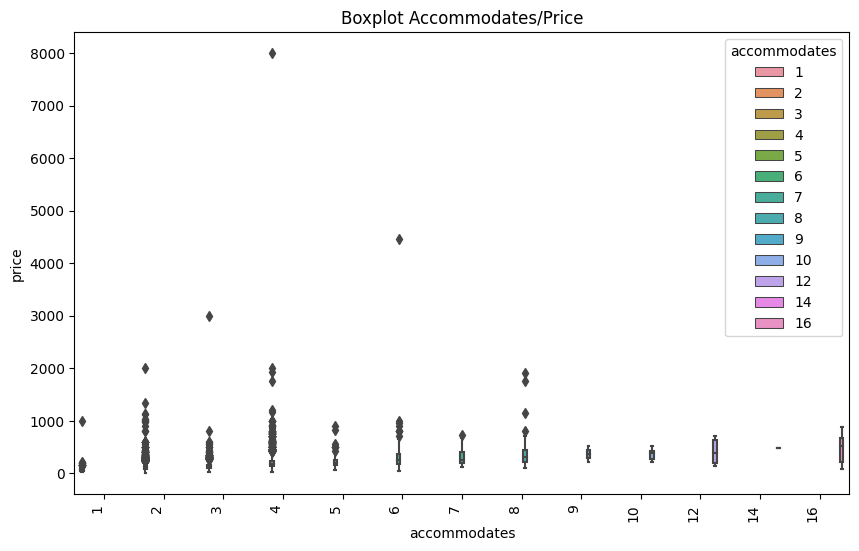

'Boxplot for price related to the maximum number of people the airbnb accommodates'

In [395]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=shortairbnbs, x="accommodates", y="price", hue="accommodates")
plt.xticks(rotation=90, ha="right")
plt.title("Boxplot Accommodates/Price")
plt.show()
"""Boxplot for price related to the maximum number of people the airbnb accommodates"""

The boxplot graph shows that the prices differs in every accommodate count

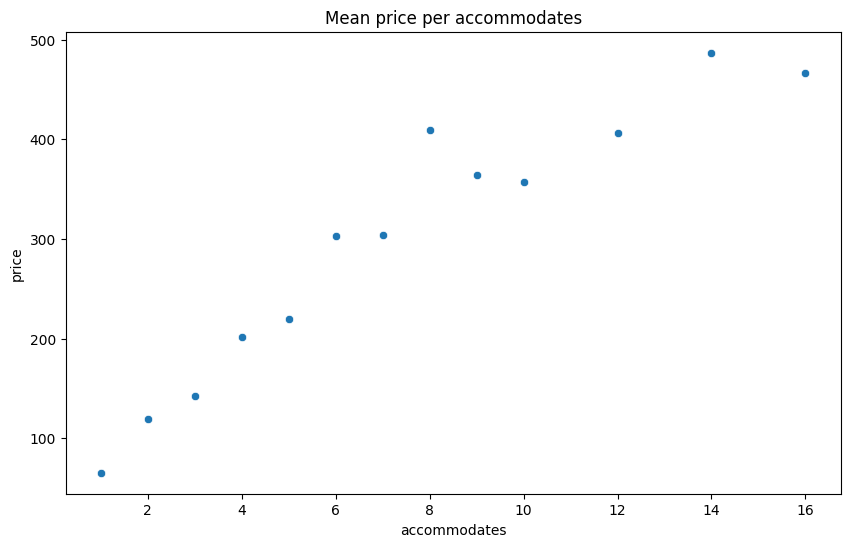

'Show mean price of airbnbs with the same maximum number of accommodations'

In [397]:
accommodates_summary = shortairbnbs.groupby("accommodates").agg(price=("price", "mean"), n=("accommodates", "count")).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=accommodates_summary, x="accommodates", y="price")
plt.title("Mean price per accommodates")
plt.show()
"""Show mean price of airbnbs with the same maximum number of accommodations"""

The graph shows that mean price is higher in accommodation with higher number if accommodates

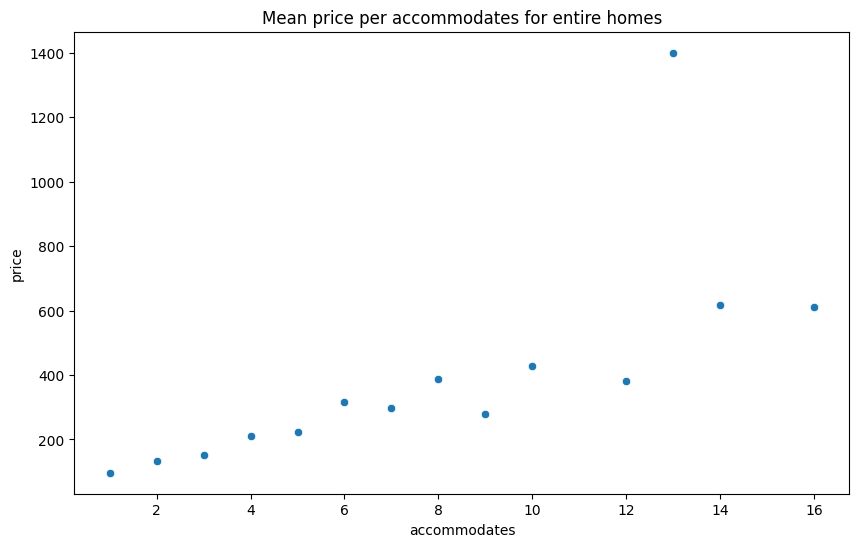

In [398]:
accommodates_summary_homes = airbnbs_entire_home.groupby("accommodates").agg(price=("price", "mean"), n=("accommodates", "count")).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=accommodates_summary_homes, x="accommodates", y="price")
plt.title("Mean price per accommodates for entire homes")
plt.show()

This graph is same as the previous one, only difference is that it only includes the room type of entire home/apt

3. Show how price correlates with the neighbourhood the airbnb is located in

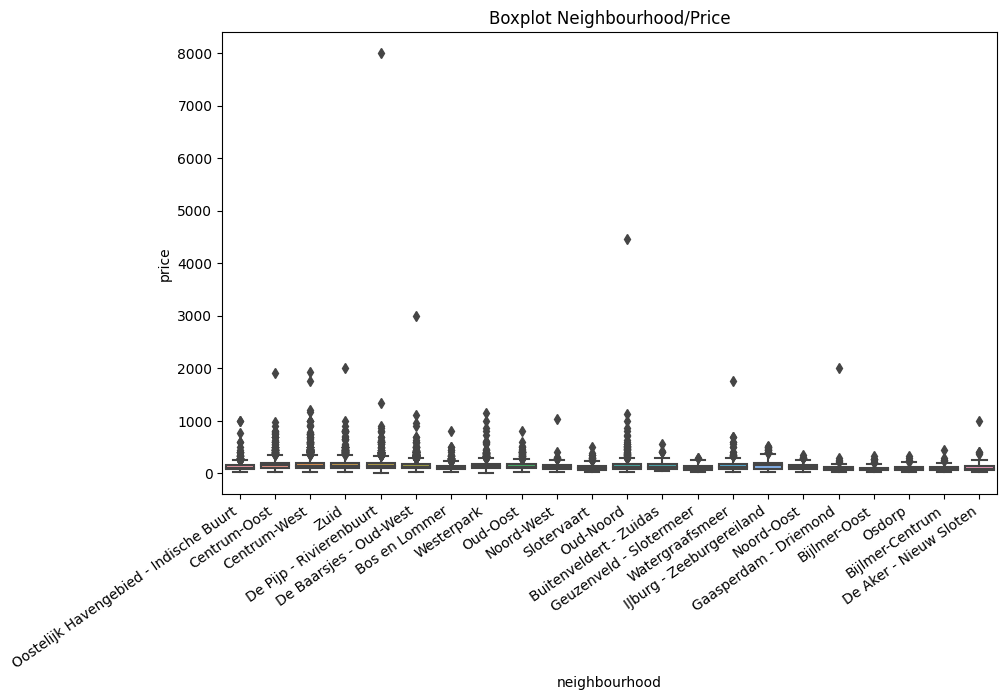

'Boxplot for price related to the neighbourhood the airbnb is in'

In [399]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=shortairbnbs, x="neighbourhood", y="price")
plt.xticks(rotation=35, ha="right")
plt.title("Boxplot Neighbourhood/Price")
plt.show()
"""Boxplot for price related to the neighbourhood the airbnb is in"""

The boxplot graph shows that the prices differ based on the neighborhood.
To inspect it further, mean prices overview has been created in the next table.

Mean price of the airbnbs in the same neighbourhood
The table below shows that the mean price ranges from 98.62 - 171.24 and the cheapest neighbourhoods are 
Bijmer-Centrum and Bijmer-Oost

In [400]:
neighbourhood_summary = shortairbnbs.groupby("neighbourhood").agg(mean_price=("price", "mean"), n=("neighbourhood", "count")).reset_index()
neighbourhood_summary

,neighbourhood,mean_price,n
0,Bijlmer-Centrum,98.619048,84
1,Bijlmer-Oost,95.096386,83
2,Bos en Lommer,123.429508,915
3,Buitenveldert - Zuidas,138.026316,190
4,Centrum-Oost,171.553144,1336
5,Centrum-West,175.470252,1748
6,De Aker - Nieuw Sloten,122.750000,100
7,De Baarsjes - Oud-West,147.581805,2726
8,De Pijp - Rivierenbuurt,164.353393,1963
9,Gaasperdam - Driemond,107.905660,106


To visualize this, a new table that includes the mean price for every neighbourhood has been created

In [401]:
newtable_price = pd.merge(shortairbnbs, neighbourhood_summary, on="neighbourhood")
newtable_price.head()

,id,name,host_id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,price,...,first_review,last_review,review_rating,review_accuracy,review_cleanliness,review_checkin,review_communication,review_location,mean_price,n
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room in apartment,Private room,2,59.0,...,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,128.983312,779
1,52490,Amsterdam Aqua,185836,Oostelijk Havengebied - Indische Buurt,52.37005,4.93869,Private room in apartment,Private room,2,75.0,...,2010-11-03,2020-01-01,92.0,10.0,10.0,10.0,10.0,9.0,128.983312,779
2,141708,light modern & cosy apartment,689016,Oostelijk Havengebied - Indische Buurt,52.36674,4.93748,Entire apartment,Entire home/apt,3,145.0,...,2011-06-28,2020-01-02,95.0,9.0,10.0,10.0,10.0,9.0,128.983312,779
3,250751,Modern studio near central AMS,1314658,Oostelijk Havengebied - Indische Buurt,52.36610,4.93299,Entire apartment,Entire home/apt,2,79.0,...,2014-09-25,2020-03-11,92.0,10.0,10.0,9.0,10.0,9.0,128.983312,779
4,415619,Sunny Amsterdam East Harbor View,1336633,Oostelijk Havengebied - Indische Buurt,52.36958,4.93516,Entire apartment,Entire home/apt,3,145.0,...,2012-05-21,2020-09-13,98.0,10.0,10.0,10.0,10.0,10.0,128.983312,779


The table is used in the follwing graph, showing the mean price of the neighbourhoods
From the graph can be seen that the highest mean prices are  in the center of Amsterdam.

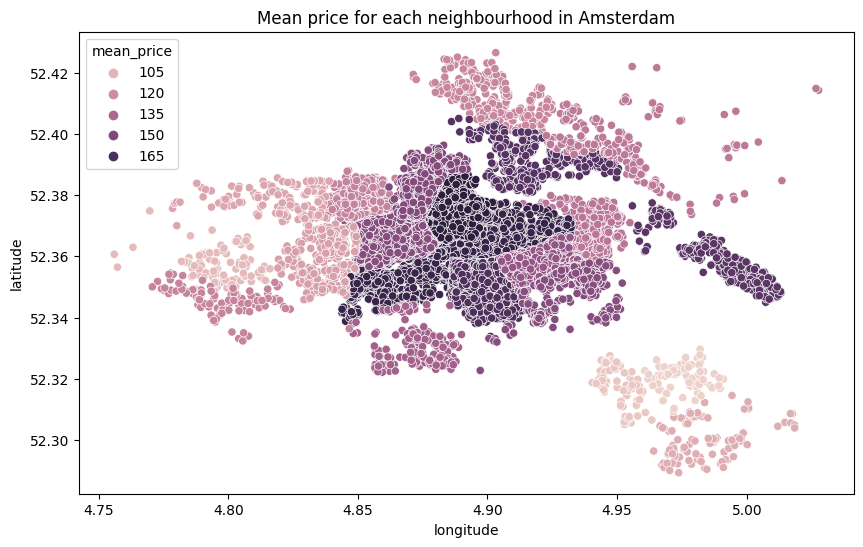

In [402]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=newtable_price, x="longitude", y="latitude", hue="mean_price")
plt.title("Mean price for each neighbourhood in Amsterdam")
plt.show()

Therefore a new table has been created that includes neighbourhood, room_type, price, review_location and count

In [403]:
neighbourhood_room_type_summary = shortairbnbs.groupby(["neighbourhood", "room_type"]).agg(price=("price", "mean"), review_location=("review_location", "mean"), n=("neighbourhood", "count")).reset_index()
neighbourhood_room_type_summary.head()

,neighbourhood,room_type,price,review_location,n
0,Bijlmer-Centrum,Entire home/apt,124.853659,9.073171,41
1,Bijlmer-Centrum,Private room,73.604651,8.976744,43
2,Bijlmer-Oost,Entire home/apt,138.294118,8.529412,34
3,Bijlmer-Oost,Private room,65.122449,8.877551,49
4,Bos en Lommer,Entire home/apt,131.824273,9.137800,791


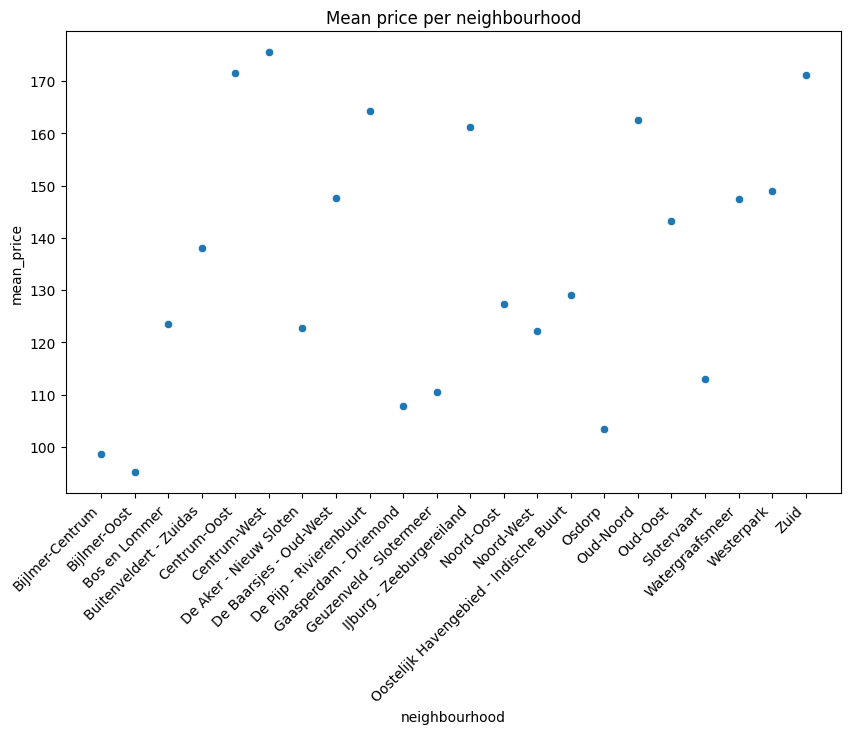

'Scatterplot to show the correlation between mean price and the neighbourhoods'

In [404]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=neighbourhood_summary, x="neighbourhood", y="mean_price")
plt.xticks(rotation=45, ha="right")
plt.title("Mean price per neighbourhood")
plt.show()
"""Scatterplot to show the correlation between mean price and the neighbourhoods"""

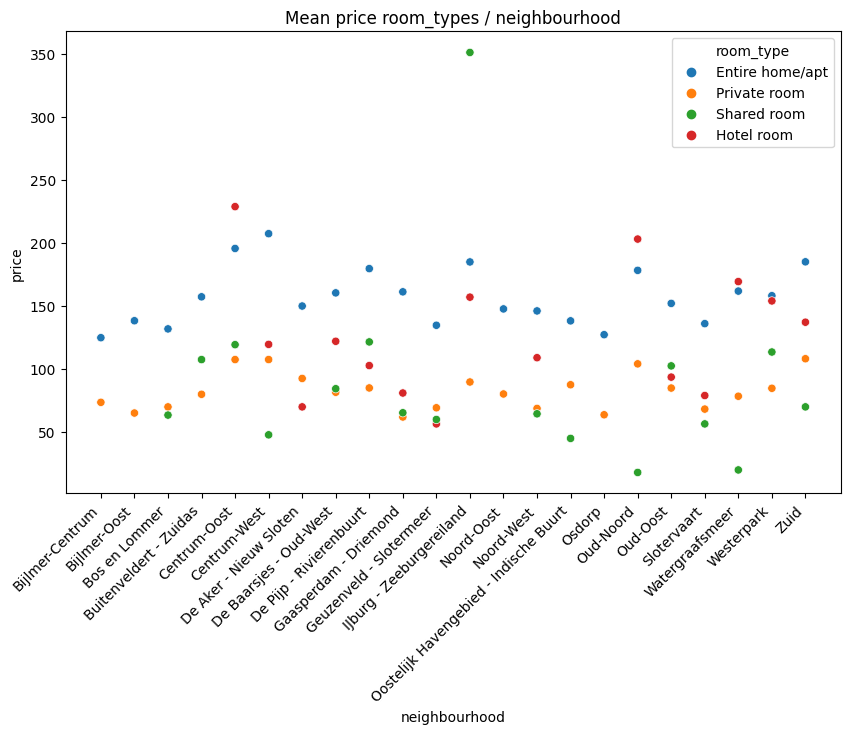

'\nScatterplot to show the correlation between mean price, room types and the neighbourhoods\n'

In [405]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=neighbourhood_room_type_summary, x="neighbourhood", y="price", hue="room_type")
plt.xticks(rotation=45, ha="right")
plt.title("Mean price room_types / neighbourhood")
plt.show()
"""
Scatterplot to show the correlation between mean price, room types and the neighbourhoods
"""

# 3. Create models to help visualize and understand the data

To be able to check the correlation matrix a numeric subset of shortairbnbs has been created.

In [406]:
numericvars = ["accommodates", "price", "bedrooms", "beds", "review_rating", "review_accuracy", "review_cleanliness", "review_checkin", "review_communication", "review_location"]
numericairbnbs = shortairbnbs[numericvars]
numericairbnbs.head()

,accommodates,price,bedrooms,beds,review_rating,review_accuracy,review_cleanliness,review_checkin,review_communication,review_location
0,2,59.0,1.0,2.0,98.0,10.0,10.0,10.0,10.0,9.0
1,2,236.0,1.0,1.0,89.0,10.0,10.0,10.0,10.0,10.0
2,3,125.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0
3,2,135.0,1.0,1.0,99.0,10.0,10.0,10.0,10.0,10.0
4,2,75.0,1.0,1.0,97.0,10.0,10.0,10.0,10.0,10.0


Perform a correlation test for the numeric subset numericairbnbs

In [407]:
res = numericairbnbs.corr()
res

,accommodates,price,bedrooms,beds,review_rating,review_accuracy,review_cleanliness,review_checkin,review_communication,review_location
accommodates,1.000000,0.379284,0.734004,0.777957,-0.018691,-0.040919,-0.049254,-0.004475,-0.014067,-0.041669
price,0.379284,1.000000,0.338999,0.301878,0.033717,0.005715,0.018891,-0.000900,-0.001883,0.072974
bedrooms,0.734004,0.338999,1.000000,0.750875,0.017874,-0.013126,-0.023563,0.013327,0.003320,-0.024196
beds,0.777957,0.301878,0.750875,1.000000,-0.013084,-0.032690,-0.023852,0.000520,-0.009155,-0.025069
review_rating,-0.018691,0.033717,0.017874,-0.013084,1.000000,0.718092,0.684977,0.582056,0.635779,0.367314
review_accuracy,-0.040919,0.005715,-0.013126,-0.032690,0.718092,1.000000,0.557153,0.518856,0.564248,0.316466
review_cleanliness,-0.049254,0.018891,-0.023563,-0.023852,0.684977,0.557153,1.000000,0.419116,0.443038,0.255506
review_checkin,-0.004475,-0.000900,0.013327,0.000520,0.582056,0.518856,0.419116,1.000000,0.649131,0.303247
review_communication,-0.014067,-0.001883,0.003320,-0.009155,0.635779,0.564248,0.443038,0.649131,1.000000,0.308835
review_location,-0.041669,0.072974,-0.024196,-0.025069,0.367314,0.316466,0.255506,0.303247,0.308835,1.000000


Correlation matrix and p-values

In [408]:

# Identify and handle NaNs
numericairbnbs= numericairbnbs.replace([np.inf, -np.inf], np.nan)
numericairbnbs= numericairbnbs.dropna()
numeric_columns = numericairbnbs.select_dtypes(include='number').columns
print(f"numeric_columns after handling NaNs: \n {numeric_columns}")

# Calculate correlation coefficients and p-values
correlations = []
p_values = []

for col1 in numeric_columns:
    for col2 in numeric_columns:
        correlation, p_value = pearsonr(numericairbnbs[col1], numericairbnbs[col2])
        correlations.append((col1, col2, correlation))
        p_values.append((col1, col2, p_value))

# Create DataFrames for correlation coefficients and p-values
correlation_df = pd.DataFrame(correlations, columns=['variable1', 'variable2', 'correlation'])
p_value_df = pd.DataFrame(p_values, columns=['variable1', 'variable2', 'p-value'])

# Merge the two DataFrames on the common columns 'variable1' and 'variable2'
res2 = pd.merge(correlation_df, p_value_df, on=['variable1', 'variable2'])

# Print the result
print(f"Dataframe with correlation and p values:\n {res2}")


numeric_columns after handling NaNs: 
 Index(['accommodates', 'price', 'bedrooms', 'beds', 'review_rating',
       'review_accuracy', 'review_cleanliness', 'review_checkin',
       'review_communication', 'review_location'],
      dtype='object')
Dataframe with correlation and p values:
           variable1             variable2  correlation        p-value
0      accommodates          accommodates     1.000000   0.000000e+00
1      accommodates                 price     0.375242   0.000000e+00
2      accommodates              bedrooms     0.733710   0.000000e+00
3      accommodates                  beds     0.779176   0.000000e+00
4      accommodates         review_rating    -0.025450   1.816668e-03
..              ...                   ...          ...            ...
95  review_location       review_accuracy     0.307235   0.000000e+00
96  review_location    review_cleanliness     0.248685  2.057154e-210
97  review_location        review_checkin     0.298472  1.505029e-306
98  review_

Extracting the correlation coefficients and p-values

In [409]:
print(res2.columns)
res2["correlation"]
res2["p-value"]

Index(['variable1', 'variable2', 'correlation', 'p-value'], dtype='object')


0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      1.816668e-03
          ...      
95     0.000000e+00
96    2.057154e-210
97    1.505029e-306
98     0.000000e+00
99     0.000000e+00
Name: p-value, Length: 100, dtype: float64

Leave out insignificant correlations for res

In [410]:
res[np.abs(res) < 0.4] = 0
res

,accommodates,price,bedrooms,beds,review_rating,review_accuracy,review_cleanliness,review_checkin,review_communication,review_location
accommodates,1.000000,0.0,0.734004,0.777957,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
price,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
bedrooms,0.734004,0.0,1.000000,0.750875,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
beds,0.777957,0.0,0.750875,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
review_rating,0.000000,0.0,0.000000,0.000000,1.000000,0.718092,0.684977,0.582056,0.635779,0.0
review_accuracy,0.000000,0.0,0.000000,0.000000,0.718092,1.000000,0.557153,0.518856,0.564248,0.0
review_cleanliness,0.000000,0.0,0.000000,0.000000,0.684977,0.557153,1.000000,0.419116,0.443038,0.0
review_checkin,0.000000,0.0,0.000000,0.000000,0.582056,0.518856,0.419116,1.000000,0.649131,0.0
review_communication,0.000000,0.0,0.000000,0.000000,0.635779,0.564248,0.443038,0.649131,1.000000,0.0
review_location,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


Leave out insignificant correlations for res2

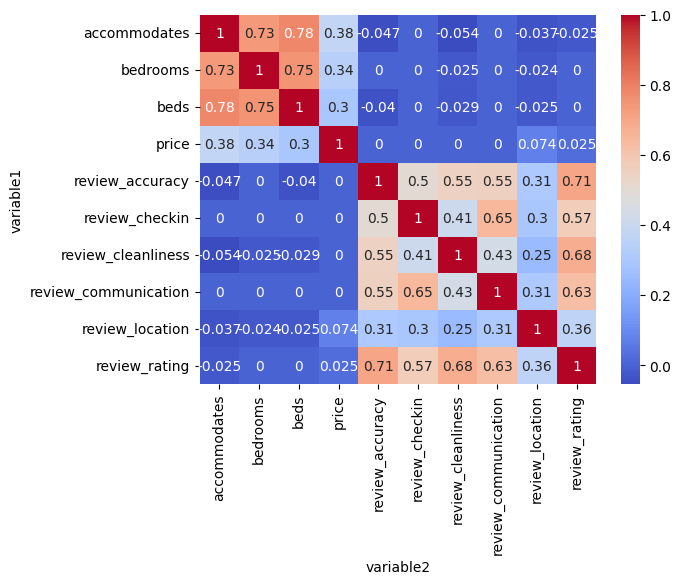

In [411]:
res2.loc[res2["p-value"] > 0.01, "correlation"] = 0
res2_pivot = res2.pivot(index="variable1", columns="variable2", values="correlation")

# Create a heatmap
color_corr = sns.heatmap(res2_pivot, annot=True, cmap='coolwarm')

The table above shows that the variables with the biggest correlation to the price are   
accommodates with 38%,  
and bedrooms with 34%,  
These 2 values then between each other have correlations between 73%.   


'Correlation between accommodates and bedrooms'

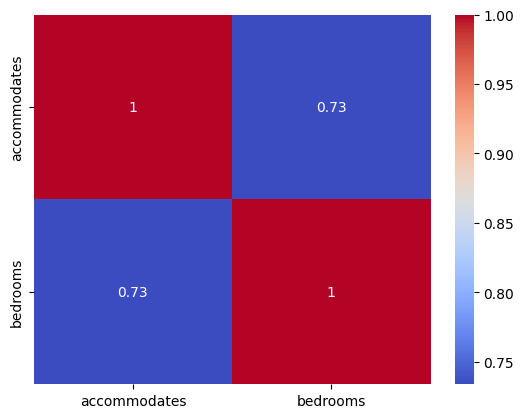

In [412]:
acc_and_bedrooms_corr = numericairbnbs[["accommodates", "bedrooms"]].corr()

# Create a heatmap
color_corr_accbedr = sns.heatmap(acc_and_bedrooms_corr, annot=True, cmap='coolwarm')
"""Correlation between accommodates and bedrooms"""

#### Create a linear regression model for price with accommodates and bedrooms

In [413]:
import statsmodels.api as sm

X = numericairbnbs[["accommodates", "bedrooms"]]
X = sm.add_constant(X)
y = numericairbnbs["price"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1319.
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:35:52   Log-Likelihood:                -92980.
No. Observations:               15014   AIC:                         1.860e+05
Df Residuals:                   15011   BIC:                         1.860e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.4214      2.397     18.116      0.000      38.723      48.120
accommodates    27.8354      1.123     24.792      0.000      25.635      30.036
bedrooms        20.2068      1.633     12.375      0.000      17.006      23.407
==============================================================================
Omnibus:                    36707.744   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1260801905.834
Skew:                          25.385   Prob(JB):                         0.00
Kurtosis:                    1421.740   Cond. No.                         9.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model equation is: price=43.4214+27.8354×accommodates+20.2068×bedrooms  
 
Prob (F-statistic): 0.00  

The probability associated with the F-statistic is a low p-value (close to zero) which suggests that at least 
one independent variable significantly contributes to predicting the dependent variable.  

P>|t|:  

This column provides the p-values associated with each t-value.   
Low p-values indicate that the corresponding coefficient is statistically significant.  

R-squared (R²): 0.149  

R-squared measures the proportion of the variance in the dependent variable that is predictable   
from the independent variables.   
In this case, about 14.9% of the variance in price is explained by the model.  

Adjusted R-squared (Adj. R-squared): 0.149  

Adjusted R-squared adjusts the R-squared value for the number of predictors in the model.   
It's useful when comparing models with different numbers of predictors. 
Meaning that 14.9% of the variance in the measure of price can be predicted by the accommodates and bedrooms.  

The coefficients for accommodates and bedrooms indicate the estimated change in price associated with a 
one-unit change in each variable, holding the other variable constant.  

t-values (t):  

The t-values are the coefficients divided by their standard errors.   
It measures how many standard deviations the estimated coefficient is from zero.   
Larger absolute t-values indicate more significant predictors.  

In [414]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [415]:
calc_vif(numericairbnbs)

,variables,VIF
0,accommodates,18.409050
1,price,2.907095
2,bedrooms,10.865667
3,beds,7.768849
4,review_rating,642.910441
5,review_accuracy,402.469709
6,review_cleanliness,219.017814
7,review_checkin,422.870431
8,review_communication,512.243780
9,review_location,189.088934


accommodates	18.409050  
bedrooms	10.865667  
A VIF above 10 suggests a problematic level of multicollinearity.  
The high VIF values indicate that there might be multicollinearity issues.   
This suggests that the variables accommodates and bedrooms are correlated,   
and this could affect the precision of the coefficient estimates.   
Let's try to create a linear regression model for just price with accommodates

In [416]:
X = numericairbnbs[["accommodates"]]
X = sm.add_constant(X)
y = numericairbnbs["price"]

model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2460.
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:39:00   Log-Likelihood:                -93056.
No. Observations:               15014   AIC:                         1.861e+05
Df Residuals:                   15012   BIC:                         1.861e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.9550      2.406     18.686      0.000      40.239      49.671
accommodates    38.0297      0.767     49.600      0.000      36.527      39.533
==============================================================================
Omnibus:                    36414.566   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1185576347.982
Skew:                          24.884   Prob(JB):                         0.00
Kurtosis:                    1378.746   Cond. No.                         8.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model equation is: price=44.9550+38.0297×accommodates  

The high F-statistic and low p-value (Prob (F-statistic): 0.00) suggest that the overall model is   
statistically significant.  

R-squared 0.141 indicates that the model explains 14.1% of the variability in price, which is not very high.   
It suggests that there may be other factors influencing the price that are not included in the model.  

The coefficient for accommodates is 38.0297. This means that, on average, each additional unit increase in the   
number of accommodates is associated with an increase of 38.03€ in the price.  

The high values for Skew and Kurtosis, as well as the extremely high Omnibus and JB statistics,   
suggest potential issues with the normality of residuals.    

In summary, the model has statistical significance (indicated by the low p-values and high F-statistic), but the 
R-squared value suggests that the model explains only a small portion of the variance in price.


Let's try to test the model only on a portion of the dataset abd that being only the values 
for the room type entire home/apt
Create a linear regression model for price with accommodates and bedrooms for numeric_homes

In [417]:
numeric_homes = airbnbs_entire_home[numericvars]
numeric_homes = numeric_homes.dropna()
numeric_homes.head()

,accommodates,price,bedrooms,beds,review_rating,review_accuracy,review_cleanliness,review_checkin,review_communication,review_location
2,3,125.0,1.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0
6,4,219.0,3.0,3.0,95.0,9.0,10.0,10.0,10.0,9.0
7,3,160.0,1.0,1.0,96.0,10.0,10.0,10.0,10.0,10.0
8,4,211.0,2.0,4.0,98.0,10.0,7.0,9.0,10.0,10.0
9,2,67.0,1.0,2.0,80.0,8.0,7.0,9.0,9.0,9.0


Perform a correlation test for the numeric subset numericairbnbs

In [418]:
resnh = numeric_homes.corr()
resnh

,accommodates,price,bedrooms,beds,review_rating,review_accuracy,review_cleanliness,review_checkin,review_communication,review_location
accommodates,1.000000,0.343974,0.751338,0.775696,-0.054044,-0.073220,-0.078323,-0.006927,-0.023456,-0.049094
price,0.343974,1.000000,0.322913,0.297044,-0.001978,-0.024730,0.000198,-0.009817,-0.022281,0.076033
bedrooms,0.751338,0.322913,1.000000,0.785798,-0.007505,-0.038006,-0.045445,0.012266,-0.008160,-0.029672
beds,0.775696,0.297044,0.785798,1.000000,-0.040308,-0.057579,-0.047783,-0.000758,-0.021150,-0.027141
review_rating,-0.054044,-0.001978,-0.007505,-0.040308,1.000000,0.687005,0.666986,0.564069,0.619009,0.364433
review_accuracy,-0.073220,-0.024730,-0.038006,-0.057579,0.687005,1.000000,0.523070,0.487656,0.552642,0.312491
review_cleanliness,-0.078323,0.000198,-0.045445,-0.047783,0.666986,0.523070,1.000000,0.387624,0.416912,0.240070
review_checkin,-0.006927,-0.009817,0.012266,-0.000758,0.564069,0.487656,0.387624,1.000000,0.624863,0.301783
review_communication,-0.023456,-0.022281,-0.008160,-0.021150,0.619009,0.552642,0.416912,0.624863,1.000000,0.307969
review_location,-0.049094,0.076033,-0.029672,-0.027141,0.364433,0.312491,0.240070,0.301783,0.307969,1.000000


Correlation matrix and p-values for numeric_homes

In [419]:
# Identify and handle NaNs
numeric_homes = numeric_homes.replace([np.inf, -np.inf], np.nan)
numeric_homes = numeric_homes.dropna()
numeric_columns_homes = numeric_homes.select_dtypes(include='number').columns
print(f"numeric_columns_homes after handling NaNs: \n {numeric_columns_homes}")

# Calculate correlation coefficients and p-values
correlations_homes = []
p_values_homes = []

for col1 in numeric_columns_homes:
    for col2 in numeric_columns_homes:
        correlation, p_value = pearsonr(numeric_homes[col1], numeric_homes[col2])
        correlations_homes.append((col1, col2, correlation))
        p_values_homes.append((col1, col2, p_value))

# Create DataFrames for correlation coefficients and p-values
correlation_df_homes = pd.DataFrame(correlations_homes, columns=['variable1', 'variable2', 'correlation'])
p_value_df_homes = pd.DataFrame(p_values_homes, columns=['variable1', 'variable2', 'p-value'])

# Merge the two DataFrames on the common columns 'variable1' and 'variable2'
res_homes = pd.merge(correlation_df_homes, p_value_df_homes, on=['variable1', 'variable2'])

# Print the result
print(f"Dataframe with correlation and p values for numeric_homes:\n {res_homes}")

numeric_columns_homes after handling NaNs: 
 Index(['accommodates', 'price', 'bedrooms', 'beds', 'review_rating',
       'review_accuracy', 'review_cleanliness', 'review_checkin',
       'review_communication', 'review_location'],
      dtype='object')
Dataframe with correlation and p values for numeric_homes:
           variable1             variable2  correlation        p-value
0      accommodates          accommodates     1.000000   0.000000e+00
1      accommodates                 price     0.343974   0.000000e+00
2      accommodates              bedrooms     0.751338   0.000000e+00
3      accommodates                  beds     0.775696   0.000000e+00
4      accommodates         review_rating    -0.054044   3.837244e-09
..              ...                   ...          ...            ...
95  review_location       review_accuracy     0.312491  4.259143e-267
96  review_location    review_cleanliness     0.240070  3.489009e-155
97  review_location        review_checkin     0.301783  2

Extracting the correlation coefficients and p-values

In [420]:
print(res_homes.columns)
res_homes["correlation"]
res_homes["p-value"]

Index(['variable1', 'variable2', 'correlation', 'p-value'], dtype='object')


0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      3.837244e-09
          ...      
95    4.259143e-267
96    3.489009e-155
97    2.283101e-248
98    4.320054e-259
99     0.000000e+00
Name: p-value, Length: 100, dtype: float64

Leave out insignificant correlations for res_homes

In [421]:
res_homes['correlation'][np.abs(res_homes['correlation']) < 0.4] = 0
res_homes

/var/folders/n0/t16244hs7cs_6x3cvcpgz3h40000gn/T/ipykernel_90293/4239926831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_homes['correlation'][np.abs(res_homes['correlation']) < 0.4] = 0


,variable1,variable2,correlation,p-value
0,accommodates,accommodates,1.000000,0.000000e+00
1,accommodates,price,0.000000,0.000000e+00
2,accommodates,bedrooms,0.751338,0.000000e+00
3,accommodates,beds,0.775696,0.000000e+00
4,accommodates,review_rating,0.000000,3.837244e-09
...,...,...,...,...
95,review_location,review_accuracy,0.000000,4.259143e-267
96,review_location,review_cleanliness,0.000000,3.489009e-155
97,review_location,review_checkin,0.000000,2.283101e-248
98,review_location,review_communication,0.000000,4.320054e-259


Leave out insignificant correlations for res_homes

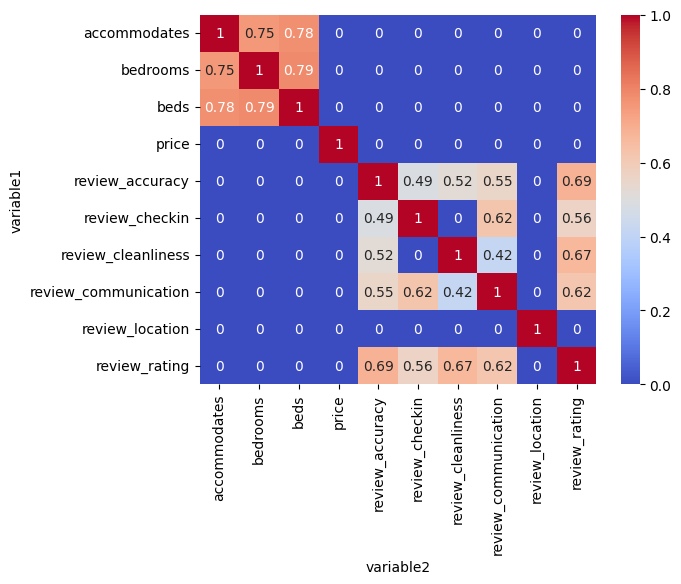

In [422]:
res_homes.loc[res_homes["p-value"] > 0.01, "correlation"] = 0
res_homes_pivot = res_homes.pivot(index="variable1", columns="variable2", values="correlation")

# Create a heatmap
color_corr_homes = sns.heatmap(res_homes_pivot, annot=True, cmap='coolwarm')

In [423]:
X = numeric_homes[["accommodates", "bedrooms"]]
X = sm.add_constant(X)
y = numeric_homes["price"]

model3 = sm.OLS(y, X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     869.7
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:44:45   Log-Likelihood:                -74192.
No. Observations:               11867   AIC:                         1.484e+05
Df Residuals:                   11864   BIC:                         1.484e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           57.3902      3.015     19.036      0.000      51.481      63.300
accommodates    24.9488      1.393     17.914      0.000      22.219      27.679
bedrooms        23.1422      2.031     11.395      0.000      19.161      27.123
==============================================================================
Omnibus:                    29439.764   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        979526914.202
Skew:                          26.349   Prob(JB):                         0.00
Kurtosis:                    1409.497   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-statistic is 869.7 with a very low p-value (0.00), are again suggesting that at least one of the  
predictors (accommodates or bedrooms) is significant in predicting the dependent variable.  

The model explains about 12.8% of the variance in the dependent variable (price). This is understandable since   
it is only a portion of the dataset.  

The standard errors for accommodates and bedrooms are 1.393 and 2.031, respectively.  
The relatively large standard errors may suggest high variability in the estimates or   
potential collinearity between predictors.  

The large standard errors and the relatively low R-squared value may indicate that the model might not be a 
good fit or that there may be unaccounted factors affecting the price  

##### Confidence interval of the model

In [424]:
model3.conf_int()

,0,1
const,51.480547,63.299885
accommodates,22.218836,27.678728
bedrooms,19.161232,27.123232


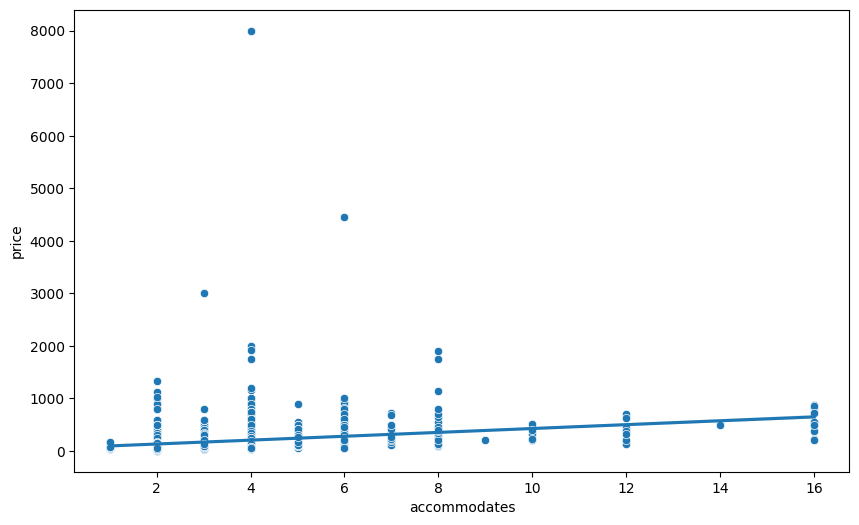

'\nPlot the relationship between accommodates and price\n'

In [425]:
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=numeric_homes, x="accommodates", y="price")
sns.regplot(data=numeric_homes, x="accommodates", y="price", scatter=False)
plt.xlabel("accommodates")
plt.ylabel("price")
plt.show()
"""
Plot the relationship between accommodates and price
"""

### Model accuracy assesment

In [426]:
# The pearson correlation statistic:
correlation = numeric_homes[['accommodates', 'bedrooms']].corr(method='pearson')
print(correlation)

              accommodates  bedrooms
accommodates      1.000000  0.751338
bedrooms          0.751338  1.000000


Having a correlation of 0.751 is very high which is why we check for collinearity
even though a collinearity of 2.329 is ok it should be keep in mind that accommodates and bedrooms is at least 
to some extend collinear and that the two variables have a high correlation. Even though it might not be as 
high as expected.  
This is why only accommodates will be included in the linear regression.

#### Linear regression for price ~ accommodates

In [427]:
model3 = sm.OLS(numeric_homes['price'], sm.add_constant(numeric_homes['accommodates'])).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     1592.
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:49:48   Log-Likelihood:                -74257.
No. Observations:               11867   AIC:                         1.485e+05
Df Residuals:                   11865   BIC:                         1.485e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           58.9308      3.028     19.461   

the F-statistic is 1592.0 and the p-value is 0.00, indicating that the model is statistically significant.  

R Squared is 0.118, indicating that approximately 11.8% of the variance in price can be explained 
by the number of accommodates.  

The R2 value is relatively low (0.118), suggesting that the model explains only a small portion of the variability 
in price.  

The standard error is relatively high, indicating that the model might not be the best fit.

In conclussion, the models suggest that while there is influence on the price by the number of accommodates, 
there are more factors influencing it that are not present in the model. Excluding some variables 
like room_type did improve the model, however, the model still falls short on caturing the 
majority of the variability. 
The standard residual error, which represents the difference between the predicted and actual values, stays 
relatively high. This indicates that there are unexplained variations in the price that the current model is 
not capable of capturing adequately. There are likely other influential factors beyond the ones considered in 
the analysis.